# Open Exoplanet Catalogue

In this exercise we explore the Open Exoplanet Catalogue, which is a compilation of the exoplanets discovered between 1992 and 2017. The dataset is available at

https://www.kaggle.com/mrisdal/open-exoplanet-catalogue

The dataset has 25 columns whose meaning is self-explainatory. Here we display:

i) The fraction of discovered exoplanets per method (radial velocity, transit, microlensing, imaging, and timing) between 2000-2016, that is, we divide the number of exoplanets found using each one of these techniques over the total.

ii) The number of planets whose temperature lies between -15 and 50 Celsius degrees, meeting one of the conditions for the existence of life.

iii) The distribution of the mass, distance to the host star and the temperature of the host star for planets that meet/don't meet the above temperature condition. 

Enjoy!

### We load the modules we use

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd

from IPython.display import display

### We import the full catalog and retrieve its size

In [3]:
full_catalog = pd.read_csv('oec.csv')
print (full_catalog.columns)
print("Size of the catalogue: {}".format(len(full_catalog)))
full_catalog.head()

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')
Size of the catalogue: 3584


,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


### Here we select the exoplanets found between 2000 and 2016. Since the catalogue includes the Solar System planets where in some cases the discovery year is undetermined, we filter out the NaNs

In [4]:
filtered_catalog = full_catalog[~full_catalog['DiscoveryYear'].isnull()]
filtered_catalog = filtered_catalog[~filtered_catalog['DiscoveryMethod'].isnull()]
filtered_catalog = filtered_catalog[(filtered_catalog['DiscoveryYear'] >=  2000) & (filtered_catalog['DiscoveryYear'] <  2017)]
print("Number of exoplanets discovered between 2000-2016: {}".format(len(filtered_catalog)))
#filtered_catalog.head()

Number of exoplanets discovered between 2000-2016: 3473


### i) Fraction of exoplanets discovered per method per year

Number of discovered exoplanets in 2000: 20
Number of discovered exoplanets in 2001: 13
Number of discovered exoplanets in 2002: 30
Number of discovered exoplanets in 2003: 25
Number of discovered exoplanets in 2004: 29
Number of discovered exoplanets in 2005: 34
Number of discovered exoplanets in 2006: 30
Number of discovered exoplanets in 2007: 64
Number of discovered exoplanets in 2008: 66
Number of discovered exoplanets in 2009: 81
Number of discovered exoplanets in 2010: 120
Number of discovered exoplanets in 2011: 189
Number of discovered exoplanets in 2012: 131
Number of discovered exoplanets in 2013: 140
Number of discovered exoplanets in 2014: 928
Number of discovered exoplanets in 2015: 197
Number of discovered exoplanets in 2016: 1376


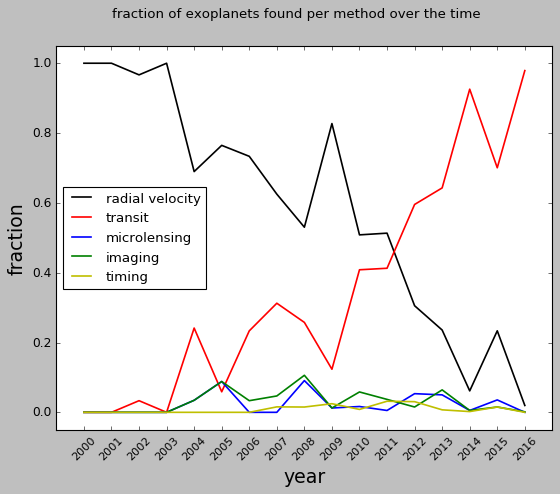

In [5]:
#We first group the planets by its discovery year. This retrieves a DataFrameGroupBy object where we find a dictionary
#whose keys are DiscoveryYear. We retrieve the corresponding data using these keys
g = filtered_catalog.groupby('DiscoveryYear');   dict_g = g.groups;   dict_keys = sorted(dict_g.keys())


frac_per_year = np.zeros((len(dict_keys),5));  idx = 0

for k in dict_keys:
    
    #We get each group (which is a data frame) with get_group()
    temp       = g.get_group(k)
    idx_array  = temp.index.values   #index array of each group
    count_rv = 0.; count_tr = 0.; count_ml = 0.; count_im = 0.; count_ti = 0.
    
    for j in idx_array:
        dm = temp.loc[j]['DiscoveryMethod']
        if dm == 'RV':
            count_rv += 1
        elif dm == 'transit':
            count_tr += 1
        elif dm == 'microlensing':
            count_ml += 1
        elif dm == 'imaging':
            count_im += 1
        elif dm == 'timing':
            count_ti += 1
        else:
            print ('error')
            
    total = count_rv + count_tr + count_ml + count_im + count_ti
    frac_per_year[idx][0] = count_rv/total
    frac_per_year[idx][1] = count_tr/total
    frac_per_year[idx][2] = count_ml/total
    frac_per_year[idx][3] = count_im/total
    frac_per_year[idx][4] = count_ti/total
    idx += 1
    
    print ("Number of discovered exoplanets in {}: {}".format(int(k),int(total)))

#In frac_per_method, the rows mean method and the columns mean the years 
frac_per_method = frac_per_year.transpose()
#print (np.shape(frac_per_method))


fig,ax = plt.subplots()
fig.suptitle('fraction of exoplanets found per method over the time',fontsize=12)

plt.plot(dict_keys,frac_per_method[0],'k',label='radial velocity',linewidth=1.5)
plt.plot(dict_keys,frac_per_method[1],'r',label='transit',linewidth=1.5)
plt.plot(dict_keys,frac_per_method[2],'b',label='microlensing',linewidth=1.5)
plt.plot(dict_keys,frac_per_method[3],'g',label='imaging',linewidth=1.5)
plt.plot(dict_keys,frac_per_method[4],'y',label='timing',linewidth=1.5)

plt.xlabel('year',fontsize=17)
xticks = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.xlim([1999,2017])
plt.xticks(xticks,fontsize=10,rotation=45)
#This is to avoid the annoying +e on the x-axis
plt.ticklabel_format(useOffset=False)

plt.ylabel('fraction',fontsize=17)
plt.ylim([-0.05,1.05])
plt.yticks(fontsize=11)

plt.legend(loc='center left',frameon=True,prop={'size':12})

### ii) Number of planets whose temperature lies within the range of life existence (-15$^\circ$C-50$^\circ$C)

In [6]:
#We first select the planets where the temperature has been determined
temp_catalog = filtered_catalog[~filtered_catalog['SurfaceTempK'].isnull()]

#We convert the temperature from Kelvin to Celsius and append the results to the temp_catalog data frame. 
tempC = (temp_catalog['SurfaceTempK']-273.16).values
#Perhaps this is the most transparent way to proceed. However, if we do this we get a warning
#temp_catalog['SurfaceTempC'] = temp_catalog['SurfaceTempK']-273.16
temp_catalog = temp_catalog.assign(SurfaceTempC=tempC)

number_life   = len(temp_catalog[(-15.0 <= temp_catalog['SurfaceTempC']) & (temp_catalog['SurfaceTempC']<= 50.0)])
number_nolife = len(temp_catalog[(temp_catalog['SurfaceTempC'] < -15.0) | (50.0 < temp_catalog['SurfaceTempC'])])

print ('number of exoplanets whose temperature has been determined: ',len(temp_catalog))
print ('number of exoplanets whose temperature lies within the range of life existence: ',number_life)
print ('number of exoplanets whose temperature is hostile to life:',number_nolife)

number of exoplanets whose temperature has been determined:  719
number of exoplanets whose temperature lies within the range of life existence:  40
number of exoplanets whose temperature is hostile to life: 679


### iii) Distribution of the mass (in Jupyter's mass units), the distance to the host star (in AU) and the temperature of the host star (in Kelvin)

In [7]:
#We append a column with the flag IsLifeFriendly. 0 means life hostile; 1 means life friendly
def temp_life(df):
    low_limit  = -15.0
    high_limit = 50.0
    if df['SurfaceTempC'] >= low_limit and df['SurfaceTempC'] <= high_limit:
        return 1
    else:
        return 0
    
temp_catalog['IsLifeFriendly']=temp_catalog.apply(temp_life,axis=1) 

#Then, we select the planets where we have the information we are interested in
temp_catalog = temp_catalog[~temp_catalog['PlanetaryMassJpt'].isnull()]
temp_catalog = temp_catalog[~temp_catalog['SemiMajorAxisAU'].isnull()]
temp_catalog = temp_catalog[~temp_catalog['HostStarTempK'].isnull()]

print ('number of exoplanets whose mass, distance and temperature have been determined: ',len(temp_catalog))
print ('number of exoplanets whose temperature lies within the range of life existence: ',len(temp_catalog[temp_catalog['IsLifeFriendly'] == 1]))
print ('number of exoplanets whose temperature is hostile to life:',len(temp_catalog[temp_catalog['IsLifeFriendly'] == 0]))

temp_catalog.head()

number of exoplanets whose mass, distance and temperature have been determined:  640
number of exoplanets whose temperature lies within the range of life existence:  33
number of exoplanets whose temperature is hostile to life: 607


,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,SurfaceTempC,IsLifeFriendly
5,Kepler-9 b,0,0.250,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN,Confirmed planets,434.04,0
6,Kepler-9 c,0,0.170,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN,Confirmed planets,284.74,0
7,Kepler-9 d,0,0.022,0.147,1.592851,0.0271,NaN,NaN,NaN,NaN,...,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN,Confirmed planets,1328.34,0
10,WASP-124 b,0,0.600,1.240,3.372650,0.0449,NaN,NaN,NaN,NaN,...,-30 44 58.8,433.0,1.07,NaN,-0.02,6050.0,NaN,Confirmed planets,1126.84,0
15,WASP-82 b,0,1.240,1.670,2.705782,0.0447,NaN,NaN,NaN,NaN,...,+01 53 38,200.0,1.63,2.18,0.12,6490.0,NaN,Confirmed planets,1916.84,0


### Planets whose temperature lies within the range of life existence

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ad5cb639668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ad5cf2cd2b0>]], dtype=object)

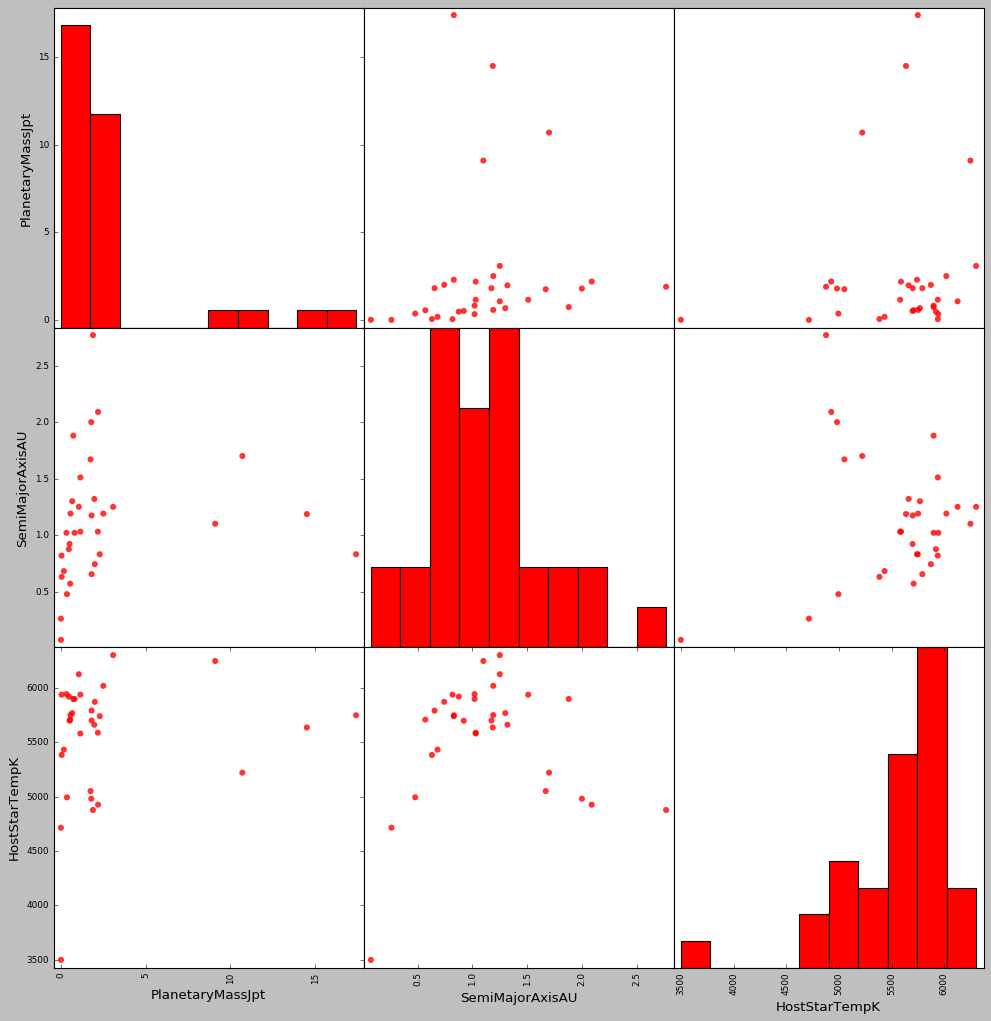

In [8]:
life_catalog = temp_catalog[temp_catalog['IsLifeFriendly'] == 1]
life_df = pd.DataFrame([life_catalog['PlanetaryMassJpt'],life_catalog['SemiMajorAxisAU'],life_catalog['HostStarTempK']])
life_df = life_df.T

pd.plotting.scatter_matrix(life_df,c='red',figsize=(15, 15),marker='o',
                           hist_kwds={'bins': 10,'color': 'red'}, s=30, alpha=.8,cmap=plt.get_cmap('bwr'))

### Planets whose temperature is hostile to life

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ad5cf41a748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ad5cf7b54a8>]], dtype=object)

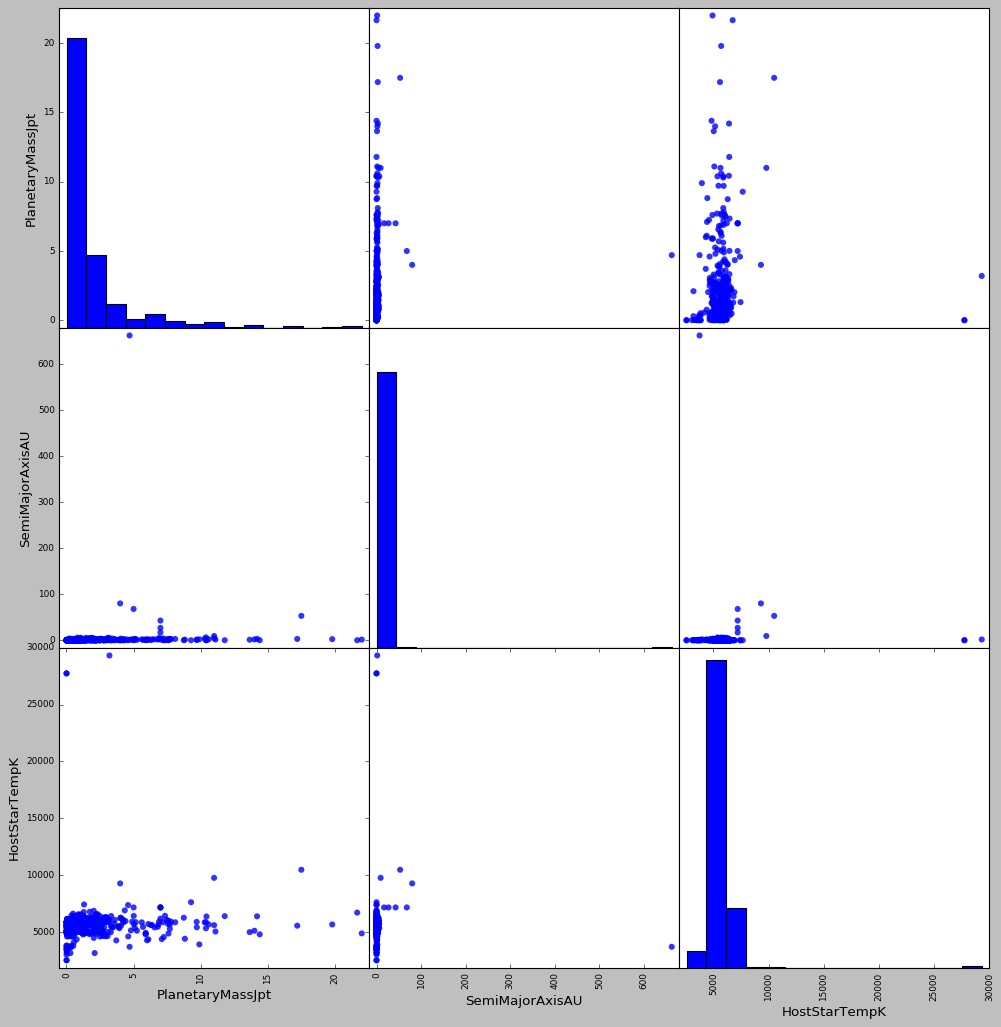

In [9]:
nolife_catalog = temp_catalog[temp_catalog['IsLifeFriendly'] == 0]
nolife_df = pd.DataFrame([nolife_catalog['PlanetaryMassJpt'],nolife_catalog['SemiMajorAxisAU'],nolife_catalog['HostStarTempK']])
nolife_df = nolife_df.T

pd.plotting.scatter_matrix(nolife_df,c='blue',figsize=(15, 15),marker='o',
                           hist_kwds={'bins': 15,'color': 'blue'}, s=30, alpha=.8,cmap=plt.get_cmap('bwr'))